In [6]:
import pandas as pd  

# Load the dataset  
file_path = "C:\\Users\\patha\\OneDrive\\Desktop\\Case studies\\Electric Vehicle\\ElectricVehicleData.xlsx"
  # Update with your actual file name  
df = pd.read_excel(file_path)  

# Display basic info  
df.info()  
df.head()  # Show the first few rows  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [7]:
import pandas as pd

# Handling missing values
df.drop_duplicates(inplace=True)  # Remove duplicate rows
df.dropna(subset=['County', 'City', 'Postal Code', 'Model', 'Legislative District', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'], inplace=True)  # Drop rows with critical missing values


### Let's start by cleaning the data. This script removes duplicates and drops rows with critical missing values.

In [8]:
# Convert 'Postal Code' and 'Legislative District' to integer for consistency
df['Postal Code'] = df['Postal Code'].astype(int)
df['Legislative District'] = df['Legislative District'].astype(int)

df.info()  # Display updated data info

<class 'pandas.core.frame.DataFrame'>
Index: 129889 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         129889 non-null  object 
 1   County                                             129889 non-null  object 
 2   City                                               129889 non-null  object 
 3   State                                              129889 non-null  object 
 4   Postal Code                                        129889 non-null  int32  
 5   Model Year                                         129889 non-null  int64  
 6   Make                                               129889 non-null  object 
 7   Model                                              129889 non-null  object 
 8   Electric Vehicle Type                              129889 non-null  object 
 9 

In [9]:
print(df.isnull().sum())


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [10]:
# Standardize column names
df.columns = (
    df.columns.str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w\s]", "", regex=True)  # Remove special characters
)

# Convert appropriate columns to correct data types
df["postal_code"] = pd.to_numeric(df["postal_code"], errors="coerce").astype("Int64")
df["legislative_district"] = pd.to_numeric(df["legislative_district"], errors="coerce").astype("Int64")
df["2020_census_tract"] = pd.to_numeric(df["2020_census_tract"], errors="coerce").astype("Int64")

# Ensure categorical variables are of type string
categorical_cols = ["make", "model", "electric_vehicle_type", "electric_utility"]
df[categorical_cols] = df[categorical_cols].astype(str)

# Verify changes
print(df.dtypes)
print(df.head())

vin_110                                            object
county                                             object
city                                               object
state                                              object
postal_code                                         Int64
model_year                                          int64
make                                               object
model                                              object
electric_vehicle_type                              object
clean_alternative_fuel_vehicle_cafv_eligibility    object
electric_range                                      int64
base_msrp                                           int64
legislative_district                                Int64
dol_vehicle_id                                      int64
vehicle_location                                   object
electric_utility                                   object
2020_census_tract                                   Int64
dtype: object


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style for better visuals
sns.set_style("whitegrid")

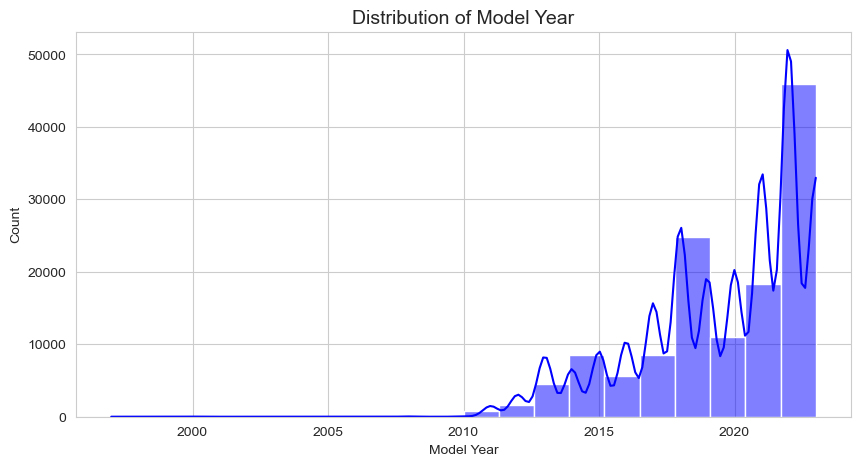

In [12]:
# Plot distribution of Model Year
plt.figure(figsize=(10, 5))
sns.histplot(df['model_year'], bins=20, kde=True, color='blue')
plt.title("Distribution of Model Year", fontsize=14)
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()

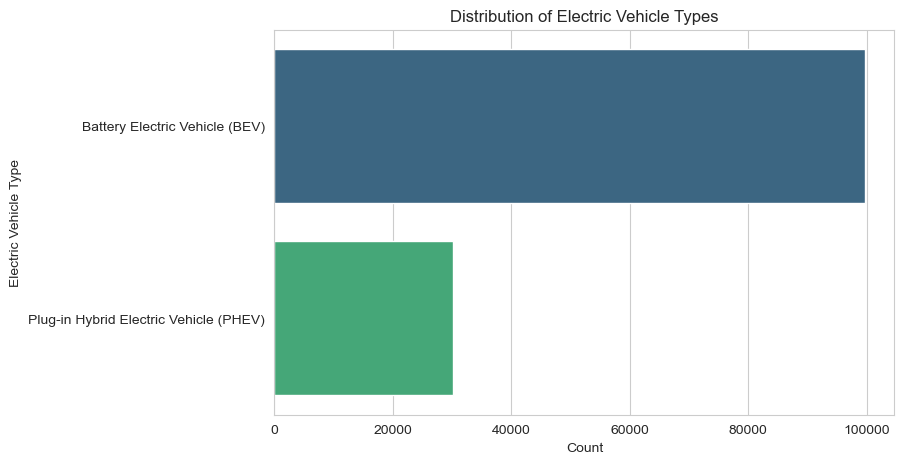

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Plot the count of each Electric Vehicle Type
sns.countplot(
    data=df, 
    y='electric_vehicle_type', 
    hue='electric_vehicle_type',  # Assign hue to avoid warning
    palette='viridis', 
    legend=False,  # Hide legend
    order=df['electric_vehicle_type'].value_counts().index
)

# Set labels
plt.xlabel("Count")
plt.ylabel("Electric Vehicle Type")
plt.title("Distribution of Electric Vehicle Types")

# Show plot
plt.show()


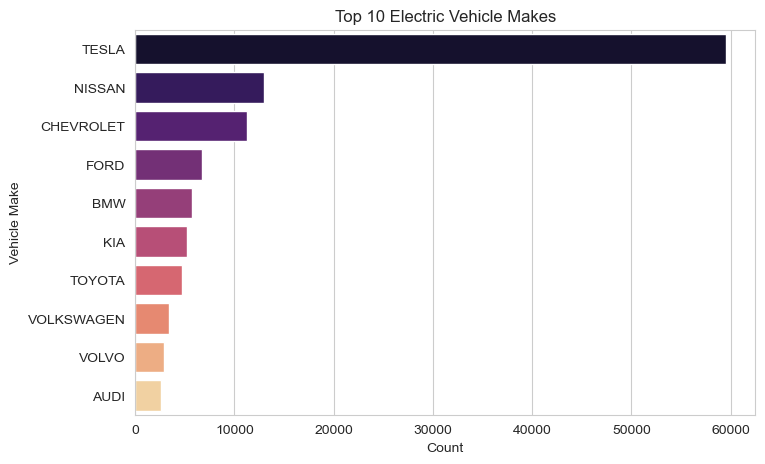

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top vehicle makes
top_makes = df['make'].value_counts().head(10)

# Set figure size
plt.figure(figsize=(8, 5))

# Plot the bar chart
sns.barplot(
    x=top_makes.values, 
    y=top_makes.index, 
    hue=top_makes.index,  # Assign hue to avoid warning
    palette='magma', 
    legend=False  # Hide legend
)

# Set labels
plt.xlabel("Count")
plt.ylabel("Vehicle Make")
plt.title("Top 10 Electric Vehicle Makes")

# Show plot
plt.show()
